In [63]:
import pandas as pd
df = pd.read_csv("Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Heart_Disease_Code"] = le.fit_transform(df["Heart Disease"])
print(df[["Heart_Disease_Code","Heart Disease"]].head())

   Heart_Disease_Code Heart Disease
0                   1      Presence
1                   0       Absence
2                   1      Presence
3                   0       Absence
4                   0       Absence


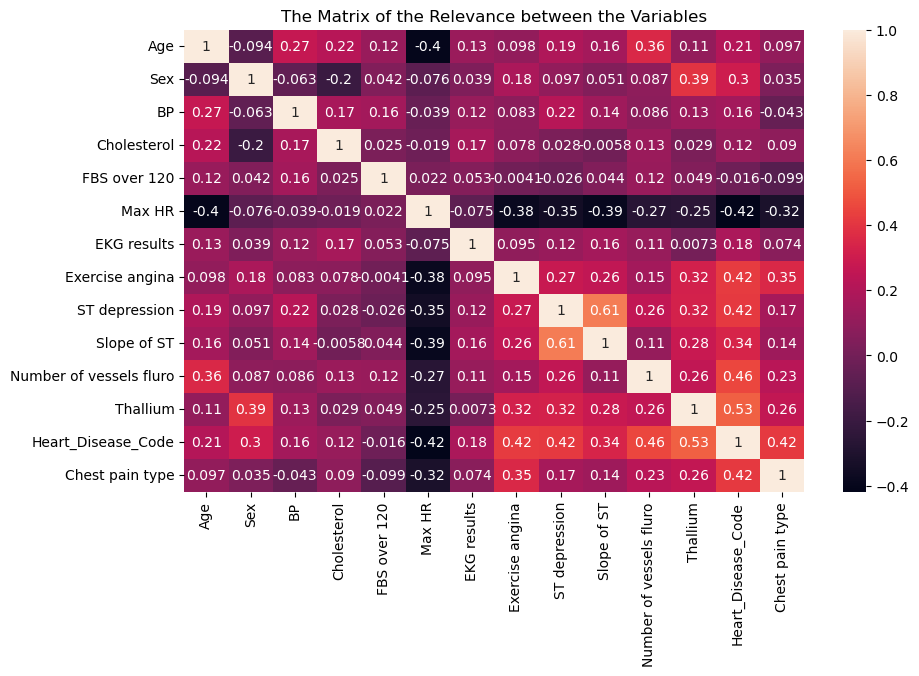

In [67]:
numerical_data = df[["Age","Sex","BP","Cholesterol","FBS over 120","Max HR","EKG results","Exercise angina","ST depression","Slope of ST","Number of vessels fluro","Thallium","Heart_Disease_Code","Chest pain type"]]
correlation = numerical_data.corr()

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True)
plt.title("The Matrix of the Relevance between the Variables")
plt.show()

In [69]:
x = df[["Age","Sex","BP","Cholesterol","FBS over 120","Max HR","EKG results","Exercise angina","ST depression","Slope of ST","Number of vessels fluro","Thallium","Chest pain type"]]
y = df["Heart_Disease_Code"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print("The shape of the train set ",X_train.shape)
print("The shape of the test set ",X_test.shape)

The shape of the train set  (216, 13)
The shape of the test set  (54, 13)


In [71]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print("The constant of the model ",lm.intercept_)

The constant of the model  -0.6992946119389125


In [90]:
predictions = lm.predict(X_test)
score = lm.score(X_test,y_test)
print(f"The score of the model (R^2) {score*100:.2f}")

The score of the model (R^2) 52.93


In [88]:
x = df[["Age","Sex","Max HR","Exercise angina","ST depression","Slope of ST","Number of vessels fluro","Thallium","Chest pain type"]]
y = df["Heart_Disease_Code"]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
score = lm.score(X_test,y_test)
print(f"The score of the model (R^2) {score*100:.2f}")

The score of the model (R^2) 52.93


In [80]:
from sklearn.metrics import accuracy_score
first_predictions = lm.predict(X_test)
rounded_predictions = (first_predictions > 0.5).astype(int)
real_score = accuracy_score(y_test, rounded_predictions )
print(f"First False Rate (R^2): %{lm.score(X_test, y_test) * 100:.2f}")
print(f"Real Rate (Accuracy): %{real_score * 100:.2f}")

First False Rate (R^2): %52.93
Real Rate (Accuracy): %88.89


In [86]:
x = df[["Age","Sex","BP","Cholesterol","FBS over 120","Max HR","EKG results","Exercise angina","ST depression","Slope of ST","Number of vessels fluro","Thallium","Chest pain type"]]
y = df["Heart_Disease_Code"]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
lm = LinearRegression()
lm.fit(X_train,y_train)
first_predictions = lm.predict(X_test)
rounded_predictions = (first_predictions > 0.5).astype(int)
real_score = accuracy_score(y_test, rounded_predictions )
print(f"Real Rate (Accuracy): %{real_score * 100:.2f}")

Real Rate (Accuracy): %92.59
